# LOGISTIC REGRESSION

We now consider a binary classification task. We choose the "Hearth Disease" classification dataset. This dataset contains information about patients with heart disease, including their age, sex, cholesterol levels, and other characteristics.
1. Age: Age of the patient
2. Sex: The gender of the patient (male or female)
3. Chest Pain type [cp]: The type of chest pain experienced by the patient (typical angina, atypical angina, non-anginal pain, or asymptomatic)
4. Resting Blood Pressure [trestbps]: The blood pressure of the patient when they are at rest
5. Serum Cholesterol [chol]: The cholesterol level of the patient's blood
6. Fasting Blood Sugar [fbs]: The blood sugar level of the patient after fasting
7. Resting ECG Results [restecg]: The results of an electrocardiogram (ECG) taken when the patient is at rest.
8. Max Heart Rate [thalach]: The maximum heart rate achieved by the patient during a stress test.
9. Exercise Induced Angina [exang]: Whether the patient experienced angina during exercise (yes or no)
10. ST Depression [oldpeak]: A measure of the depression of the ST segment of the patient's ECG during exercise: integer or float.
11. Slope of the peak exercise ST segment [slope] : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart
12. Number of major vessels (0–3) colored by flourosopy [ca]: displays the value as integer or float.
13. Displays the thalassemia [thal]: 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
14. Displays whether the individual is suffering from heart disease or not : yes/no. We have reescaled these values to 1/0.


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')
df.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Select the age feature
X = df[['age']]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)



## Metrics

1. Accuracy: This is the proportion of correct predictions made by the classifier. It is a simple and intuitive metric, but it can be misleading if the classes are imbalanced (e.g. there are many more negative examples than positive examples).
   
2. Precision: This is the proportion of true positive predictions made by the classifier out of all the positive predictions it made. It is a good metric to use when the negative class is more prevalent, as it measures the classifier's ability to avoid false positives.
   
3. Recall: This is the proportion of true positive predictions made by the classifier out of all the actual positive examples. It is a good metric to use when the positive class is more important, as it measures the classifier's ability to find all the positive examples.
   
4. F1 score: This is the harmonic mean of precision and recall. It is a good metric to use when you want to balance precision and recall, as it punishes classifiers that have a low precision or low recall.

## Plots
1. AUC-ROC curve: This is a curve that plots the true positive rate against the false positive rate at different classification thresholds. The area under the curve (AUC) is a measure of the classifier's performance. AUC ranges in value from 0 to 1, with a higher value indicating a better classifier. The AUC-ROC curve is a good metric to use when the classes are imbalanced and you want to see how the classifier performs at different classification thresholds.
   
2. Confusion matrix: A confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by a classifier. It is a useful tool for visualizing the performance of a classifier and understanding where it is making mistakes.





In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Calculate the precision
precision = precision_score(y_test, y_pred, pos_label='yes')
print(f'Precision: {precision:.3f}')

# Calculate the recall
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f'Recall: {recall:.3f}')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, pos_label='yes')
print(f'F1 score: {f1:.3f}')

# Calculate the AUC-ROC score
# Convert the labels to numeric values
y_test_numeric = (y_test == 'yes').astype(int)
y_pred_numeric = (y_pred == 'yes').astype(int)

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_numeric)
print(f'AUC-ROC score: {roc_auc:.3f}')

Accuracy: 0.557
Precision: 0.561
Recall: 0.719
F1 score: 0.630
AUC-ROC score: 0.549


Here we plot the confusion matrix: HD = Heart Disease

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
X, Y = [" HD (P)", "Not HD (P)"], ["HD (GT)", "Not HD(GT)"]
fig = px.imshow(cm, x=X, y=Y, text_auto=True,color_continuous_scale='Blues')
#plt.imshow(cm, cmap='Blues', interpolation='nearest')

#plt.title('Confusion matrix')
#plt.xlabel('Predicted label')
#plt.ylabel('True label')
fig.write_image('confusion_matrix.pdf')
fig.show()


A confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by a classifier. It is a useful tool for visualizing the performance of a classifier and understanding where it is making mistakes.

An AUC-ROC curve is a plot that shows the true positive rate against the false positive rate at different classification thresholds. The area under the curve (AUC) is a measure of the classifier's performance. AUC ranges in value from 0 to 1, with a higher value indicating a better classifier. The AUC-ROC curve is a good metric to use when the classes are imbalanced and you want to see how the classifier performs at different classification thresholds.

Plot a confusion matrix and an AUC-ROC curve for the age classification:

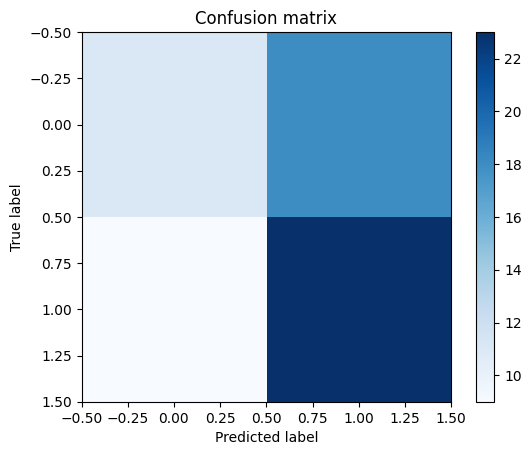

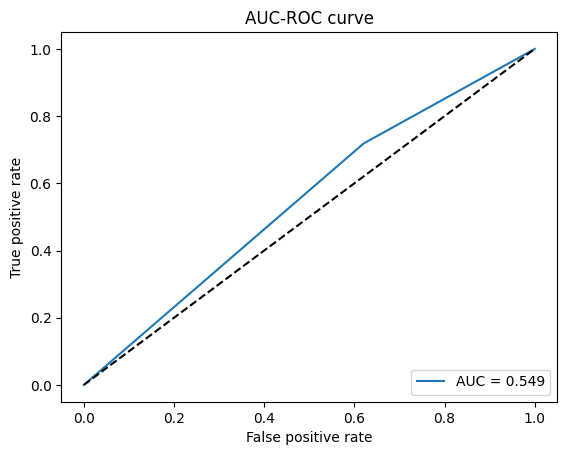

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Convert the labels to numeric values
y_test_numeric = (y_test == 'yes').astype(int)
y_pred_numeric = (y_pred == 'yes').astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numeric, y_pred_numeric)
# Plot the confusion matrix
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the AUC-ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC-ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
